In [1]:
# import necessary library
import numpy as np
import matplotlib.pyplot as plt
import math

#**DIGITAL-TO-ANALOG CONVERSION**

>***Digital-to-analog conversion is the process of changing one of the characteristics of an analog signal based on the information in digital data***

####Three meachanisms for modulating digital data into an analog signal:####
1. Amplitude Shift Keying(ASK)
2. Frequency Shift Keying(FSK)
3. Phase Shift Keying(PSK)


##**Amplitude Shift Keying**

>**The amplitude of the carrier signal is varied to create signal
elements, While both frequency and phase remain constant.**


**Binary ASK (BASK):**
> ASK is normally implemented using only two levels.
>> The peak amplitude of one signal level is 0; the other is the same as the amplitude of the carrier frequency

<br/>

####For $Unipolar$ - $NRZ$:
> Digital data are presented as digital signal with a high voltage of 1V and a low voltage of 0 V

**The $BASK$ implementation for $Unipolar$ - $NRZ$ can be achieved in two ways:**

>1. #### Very Simple Implementation:#### 
>>The $BASK$ implementation can be achieved by multiplying the $NRZ$ digital signal by the carrier signal coming from an oscillator. The same amplitude is used for 0 and 1.  
>>>When the amplitude of the $NRZ$ signal is 1, the amplitude of the carrier frequency is held. And, when the amplitude of the $NRZ$ signal is 0, the amplitude of the carrier frequency is zero.

>2. #### Alternative Implementation:####
>>The $BASK$ implementation can be achieved by assigning one carrier signal with two types of amplitudes for two levels. One amplitude for 1 and another amplitude for 0.



**$Unipolar$ - $NRZ$ Encoding**

>Given a sequence of bits and computes the $Unipolar$-$NRZ$ Encoding. Returns the encoded signal stream.

In [2]:
def compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time):
  '''
  bits      -      Digital data elements(input bits row vector)
  Time      -      Time period for sending 1 data elements
  bit_rate  -      Bit rate(the number of data elements(bits) sent in 1s)
  N         -      Bit Length of input bits
  T         -      Digital Signal per bit
  x         -      Unipolar_NRZ Line coding row vector(Digital Signal)
  t         -      Time vector for Digial Signal
  '''
  x = np.array([])
  for i in range(N):
    temp = bits[i]* np.ones((T))
    x = np.append(x, temp)
  t = np.linspace(0,N*Time,len(x))
  return [t, x]

def plot_signal(t, x):
  '''
  t - Time vector for a Signal
  x - Signal element
  '''
  plt.figure(figsize=(20, 6))
  plt.plot(t, x)
  plt.show()

###Very Simple $BASK$ Implementation ($Unipolar$ - $NRZ$) 

**Step 1: $Unipolar$ - $NRZ$ Encoding**

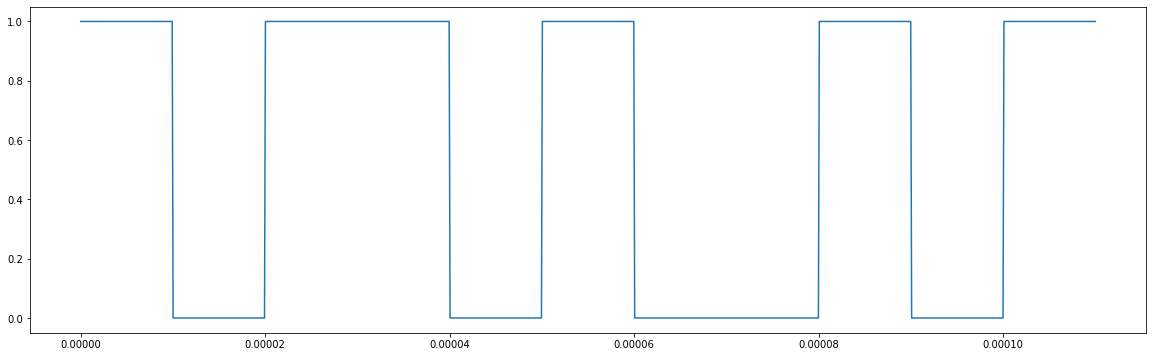

In [3]:
'''

bits      -      Digital data elements(input bits row vector)
Time      -      Time period for sending 1 data elements
bit_rate  -      Bit rate(the number of data elements(bits) sent in 1s)
N         -      Bit Length of input bits
T         -      Digital Signal per bit
x         -      Line coding row vector(Digital Signal)
t         -      Time vector for Digial Signal
'''

bits = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]) 
Time = 10e-6   
bit_rate = 1/Time 
N = len(bits)   
T = 100
t,x = compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time)
plot_signal(t, x)

**Step 2: Creating a Carrier signal**

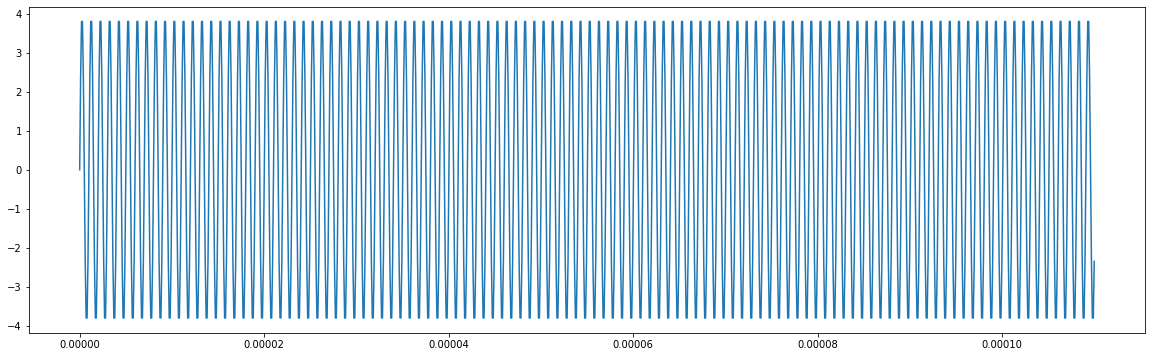

In [4]:

'''
Ac - Amplitude of the carrier signal
fc - Frequency of the carrier signal
tc - Time variable of the carrier the signal
xc - Carrier signal row vector 
'''
Ac = 4                         
fc =round(10*bit_rate)
tc = np.arange(0,N*Time,Time/T)
xc = Ac * np.sin(2.0 * np.pi * fc * tc)
plt.figure(figsize=(20, 6))
plt.plot(t, xc)
plt.show()

**Step 3: Multiplying NRZ  digital signal by the carrier signal**

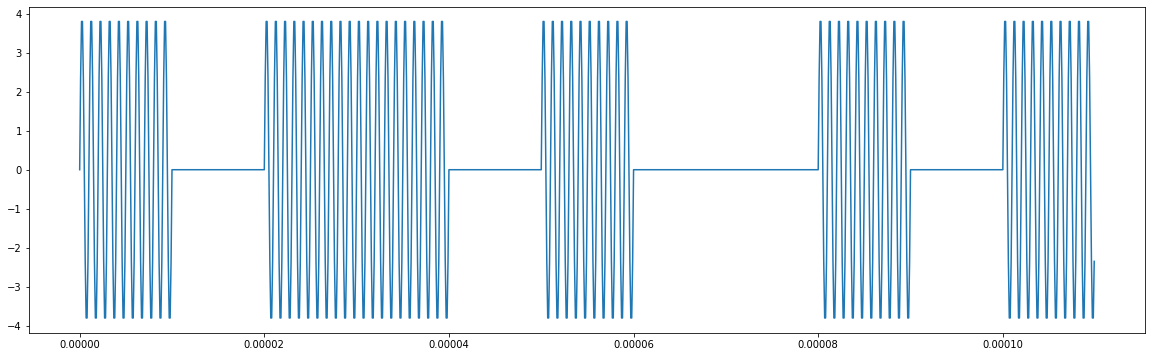

In [5]:
# ASK Modulated signal
modulated_signal = x * xc
plt.figure(figsize=(20, 6))
plt.plot(tc, modulated_signal)
plt.show()

###Alternative $BASK$ Implementation ($Unipolar$ - $NRZ$) 

**Step 1: $Unipolar$ - $NRZ$ Encoding**

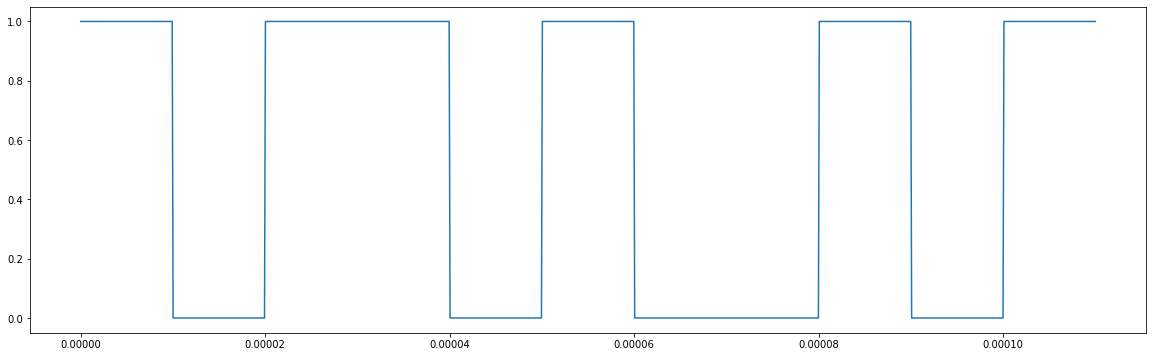

In [6]:
'''

bits      -      Digital data elements(input bits row vector)
Time      -      Time period for sending 1 data elements
bit_rate  -      Bit rate(the number of data elements(bits) sent in 1s)
N         -      Bit Length of input bits
T         -      Digital Signal per bit
x         -      Line coding row vector(Digital Signal)
t         -      Time vector for Digial Signal
'''

bits = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]) 
Time = 10e-6   
bit_rate = 1/Time 
N = len(bits)   
T = 100

t,x = compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time)
plot_signal(t, x)

**Step 2: Assigning one carrier signal with two types of amplitudes for two levels.**

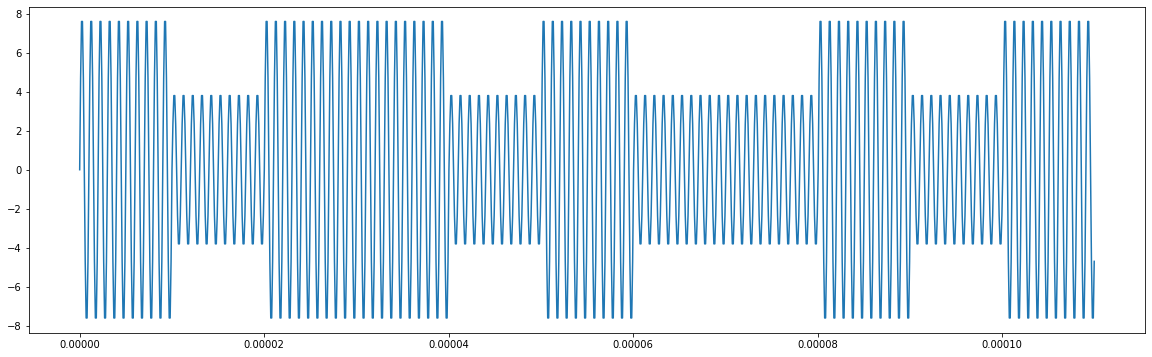

In [7]:

'''
A1 - Amplitude of the carrier signal for 1
A2 - Amplitude of the carrier signal for 0
fc - Frequency of the carrier signal
tc - Time variable of the carrier the signal for one data element
xc - Carrier signal row vector 
'''
A1 = 8
A2 = 4                         
fc =round(10*bit_rate)
tc = np.arange(0, Time, Time/T)
x2 = np.array([])
for i in range(N):
  if bits[i] == 1:
    sig = A1 * np.sin(2.0 * np.pi * fc * tc)
    x2 = np.append(x2, sig)
  else:
    sig = A2 * np.sin(2.0 * np.pi * fc * tc)
    x2 = np.append(x2, sig)
plt.figure(figsize=(20, 6))
# x2 - ASK Modulated signal
plt.plot(t, x2)
plt.show()